The problem that this assignment will be addressing will be Classification. The data set that was chosen for this assignment was the Titanic dataset. There is a lot of miscellanious information seen in the data set that makes it hard to conduct analysis on how each variable affected the outcome of a person surviving or no, so through the use of classification we can determine which groups of data are relevant to a passenger's survival. 
The data set used is data on the Titanic passengers whether they survived or not, with data on theri name, sex, age, if they had a sibling or spouse on board, if they had any parents or children, ticket, fare, cabin, and where they embarked from.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

In [248]:
df = pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [249]:
df.drop(columns = 'PassengerId', axis = 1, inplace = True)
df.drop(columns = 'Embarked', axis = 1, inplace = True)
df.drop(columns = 'Name', axis = 1, inplace = True)
df.drop(columns = 'Ticket', axis = 1, inplace = True)
df.drop(columns = 'Cabin', axis = 1, inplace = True)
df.drop(columns = 'Age', axis = 1, inplace = True)
df

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000
887,1,1,female,0,0,30.0000
888,0,3,female,1,2,23.4500
889,1,1,male,0,0,30.0000


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [251]:
#Encode categorical data
from sklearn.preprocessing import LabelEncoder

In [252]:
df_clean = df.copy()
label_encoder = LabelEncoder()
df_clean['Survived'] = label_encoder.fit_transform(df['Survived'])
df_clean['Pclass'] = label_encoder.fit_transform(df['Pclass'])
df_clean['Sex'] = label_encoder.fit_transform(df['Sex'])
df_clean['Fare'] = label_encoder.fit_transform(df['Fare'])

df_clean


,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,2,1,1,0,18
1,1,0,0,1,0,207
2,1,2,0,0,0,41
3,1,0,0,1,0,189
4,0,2,1,0,0,43
...,...,...,...,...,...,...
886,0,1,1,0,0,85
887,1,0,0,0,0,153
888,0,2,0,1,2,131
889,1,0,1,0,0,153


In [254]:
cols = df.columns.to_list()
cols.remove('Survived')
cols

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']

In [255]:
features = df_clean[cols]
response = df_clean['Survived']

In [256]:
from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = .3, random_state = 0)

In [257]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(features_train, response_train)

DecisionTreeClassifier(random_state=0)

In [258]:
predictions = classifier.predict(features_test)
table = pd.DataFrame({'actual':response_test, 'predict': predictions})
table

,actual,predict
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
263,0,0
718,0,0
620,0,0
786,1,1


In [259]:
from sklearn.metrics import accuracy_score
accuracy_score(response_test, predictions)

0.8097014925373134

In [260]:
from sklearn.metrics import confusion_matrix
confusion_matrix(response_test, predictions)

array([[144,  24],
       [ 27,  73]])

In [261]:
idx = ['actual 0', 'actual 1']
cm = pd.DataFrame(confusion_matrix(response_test, predictions),
                  columns = ['pred 0', 'pred 1'],
                  index = idx)
cm

,pred 0,pred 1
actual 0,144,24
actual 1,27,73


[Text(0.4168576388888889, 0.9736842105263158, 'Sex <= 0.5\ngini = 0.475\nsamples = 623\nvalue = [381, 242]'),
 Text(0.18861111111111112, 0.9210526315789473, 'Pclass <= 1.5\ngini = 0.371\nsamples = 215\nvalue = [53, 162]'),
 Text(0.09333333333333334, 0.868421052631579, 'Fare <= 149.5\ngini = 0.123\nsamples = 122\nvalue = [8, 114]'),
 Text(0.07555555555555556, 0.8157894736842105, 'Fare <= 147.5\ngini = 0.208\nsamples = 51\nvalue = [6, 45]'),
 Text(0.06666666666666667, 0.7631578947368421, 'Parch <= 0.5\ngini = 0.18\nsamples = 50\nvalue = [5, 45]'),
 Text(0.057777777777777775, 0.7105263157894737, 'SibSp <= 0.5\ngini = 0.239\nsamples = 36\nvalue = [5, 31]'),
 Text(0.035555555555555556, 0.6578947368421053, 'Fare <= 86.5\ngini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(0.02666666666666667, 0.6052631578947368, 'Fare <= 82.5\ngini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(0.017777777777777778, 0.5526315789473685, 'Fare <= 76.0\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.008

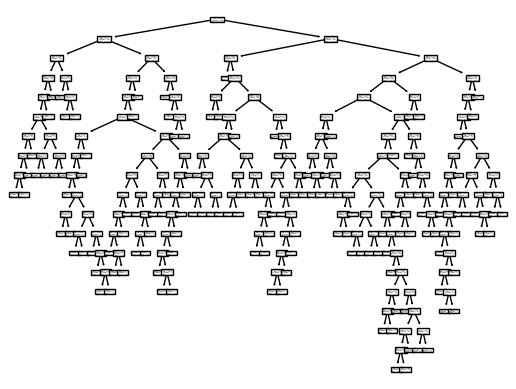

In [262]:
from sklearn.tree import plot_tree
plot_tree(classifier, feature_names = cols)

In [263]:
importance =pd.DataFrame({'features':cols, 'importance': classifier.feature_importances_})
importance

,features,importance
0,Pclass,0.118137
1,Sex,0.383103
2,SibSp,0.058706
3,Parch,0.045181
4,Fare,0.394872


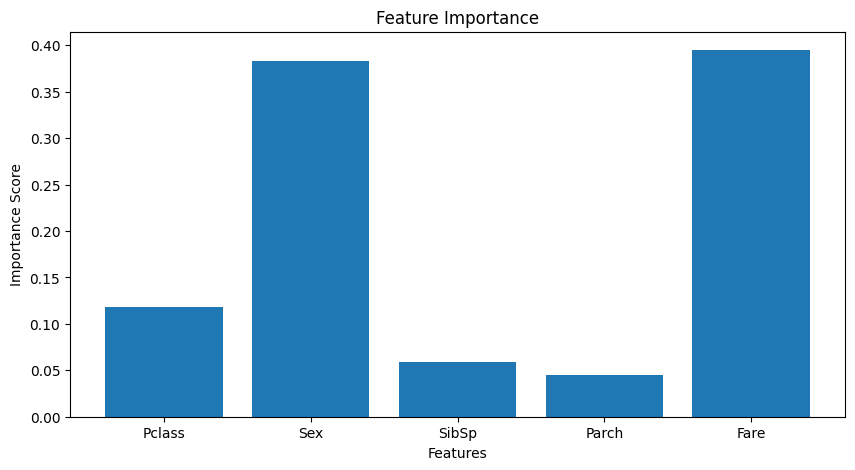

In [264]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(x = cols, height = classifier.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

Results:

The classification program has an 80.97% accruacy on predicting whether or not a passenger survived the sinking of the Titanic.

The conclusions that can be taken from this is that by far the most important factors that affected whether or not passengers survived the sinking of the Titanic was sex and the fare paid. 

It is important to note that without the inclusion of SibSp (how many spouses or siblings the passenger had on board) and Parch (how many children or parents the passenger had on board) the accuracy of program was at around 70%, so it is important to introduce some noise and less important pieces of data to place increased importance on other pieces of data. It is also important to note that not too much variables should be introduced or the program will get stuck on variables that have little to no effect on if a passenger survived.